#### About

> Bayesian Statistics.

Bayesian statistics is a branch of statistics that deals with updating probabilities based on new evidence or data. It involves formulating probability statements about unknown parameters or quantities of interest, given the observed data and any prior knowledge or beliefs about those parameters.

In Bayesian statistics, probabilities are interpreted as degrees of belief or uncertainty rather than frequencies of events. Bayes' theorem is used to update the probability of a hypothesis or parameter based on the observed data and any prior knowledge or belief. The resulting probability distribution is called the posterior distribution, which summarizes the updated information about the parameter of interest.




In [1]:
import pandas as pd
import seaborn as sns
import arviz as az
import pymc3 as pm
#The goal is to estimate the mean tip amount given certain characteristics of a restaurant bill, such as the total bill amount, the size of the dining party, and the day of the week.
tips = sns.load_dataset('tips')

In [2]:
with pm.Model() as model:
    # prior distribution for the mean tip amount
    mu = pm.Normal('mu', mu=0, sigma=10)
    
    # prior distribution for the standard deviation of the tip amount
    sigma = pm.HalfNormal('sigma', sigma=10)
    
    # likelihood function (normal distribution) for the observed tip amount
    obs = pm.Normal('obs', mu=mu, sigma=sigma, observed=tips['tip'])

In this model, we assume that the mean tip amount follows a normal distribution with a mean of 0 and a standard deviation of 10 (prior belief). We also assume that the standard deviation of the tip amount follows a half-normal distribution with a standard deviation of 10 (prior belief). The observed tip amounts are modeled as normally distributed around the mean with a standard deviation equal to the estimated sigma parameter.

In [3]:
#sample from the posterior distribution using Markov Chain Monte Carlo (MCMC) methods:
with model:
    trace = pm.sample(2000, chains=4, tune=1000)

/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 8 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<Axes: title={'center': 'mu'}>

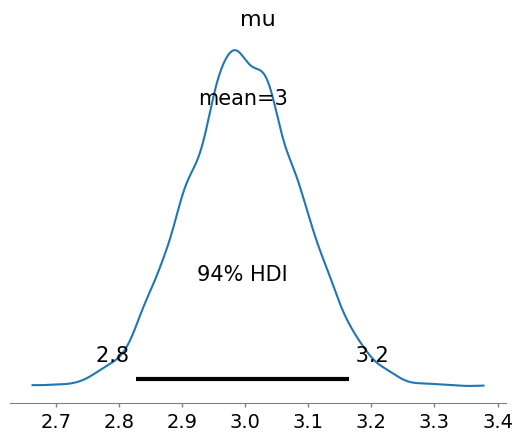

In [4]:
# visualize the posterior distr. of mean tip amount using arviz
az.plot_posterior(trace, var_names=['mu'])